In [71]:
#Importing Packages 

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [ ]:
#Import Dataset

In [9]:
nysa_df = pd.read_csv('/Users/monikavurigity/Downloads/New Year Sales Data.csv', encoding='mac_roman')

In [73]:
# Data preprocessing 

In [11]:
nysa_df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra†Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
print(nysa_df.shape)

(11251, 15)


In [15]:
print(nysa_df.dtypes)

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object


In [17]:
null_counts = nysa_df.isnull().sum()

print(null_counts)

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


In [19]:
nysa_df['Age Group'].value_counts()

Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64

In [21]:
nysa_df = nysa_df.drop(['Status', 'unnamed1'], axis=1)

In [23]:
nysa_df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra†Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [25]:
nysa_df = nysa_df.dropna(subset=['Amount'])

In [27]:
nysa_df['Amount'] = nysa_df['Amount'].astype(int)

In [75]:
## Descriptive Statistics 

In [29]:
nysa_df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [33]:
print(nysa_df.dtypes)

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object


In [35]:
nysa_df['Gender'].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

In [37]:
nysa_df['Marital_Status'].value_counts()

Marital_Status
0    6518
1    4721
Name: count, dtype: int64

In [39]:
nysa_df['State'].value_counts()

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra†Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

In [41]:
nysa_df['Zone'].value_counts()

Zone
Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: count, dtype: int64

In [43]:
nysa_df['Occupation'].value_counts()

Occupation
IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: count, dtype: int64

In [45]:
nysa_df['Orders'].value_counts()

Orders
2    2893
1    2808
4    2773
3    2765
Name: count, dtype: int64

In [47]:
## Exploratory Data Analysis 

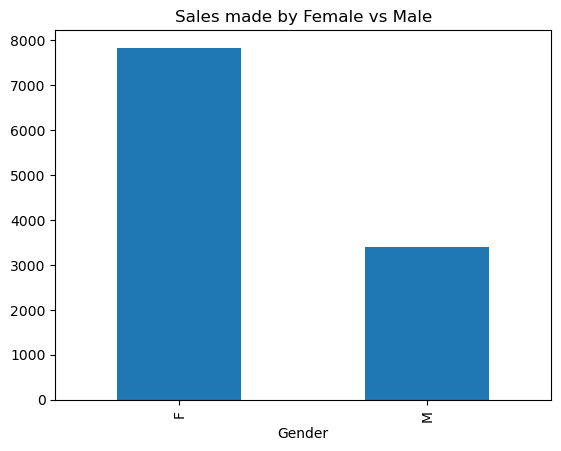

In [55]:
nysa_df['Gender'].value_counts().plot(kind = 'bar')
plt.title("Sales made by Female vs Male")
plt.show()


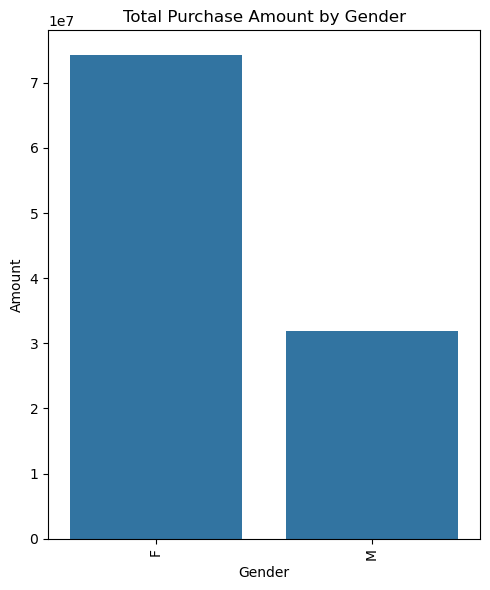

In [89]:
plt.figure(figsize=(5,6))
sns.barplot(
    data=nysa_df,
    x='Gender',
    y='Amount',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Gender')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by Gender')
plt.tight_layout()
plt.show()

In [29]:
## Age group anlaysis 

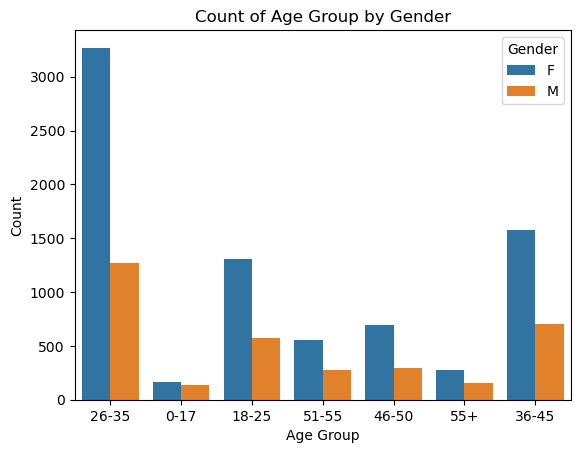

In [91]:
sns.countplot(data=nysa_df, x='Age Group', hue='Gender')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Age Group by Gender')
plt.show()


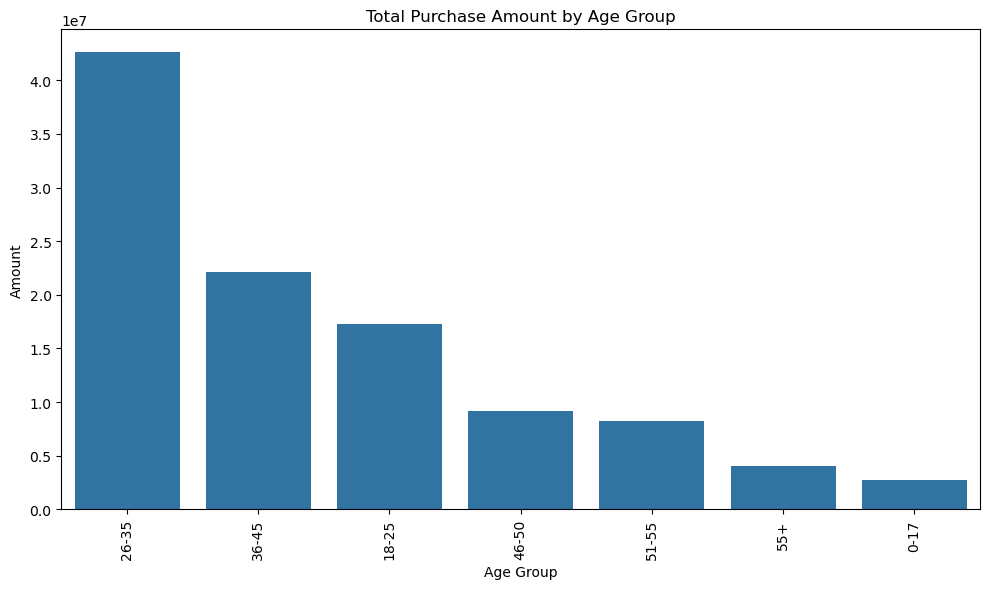

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=nysa_df,
    x='Age Group',
    y='Amount',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by Age Group')
plt.tight_layout()
plt.show()

In [33]:
## State Anlysis 

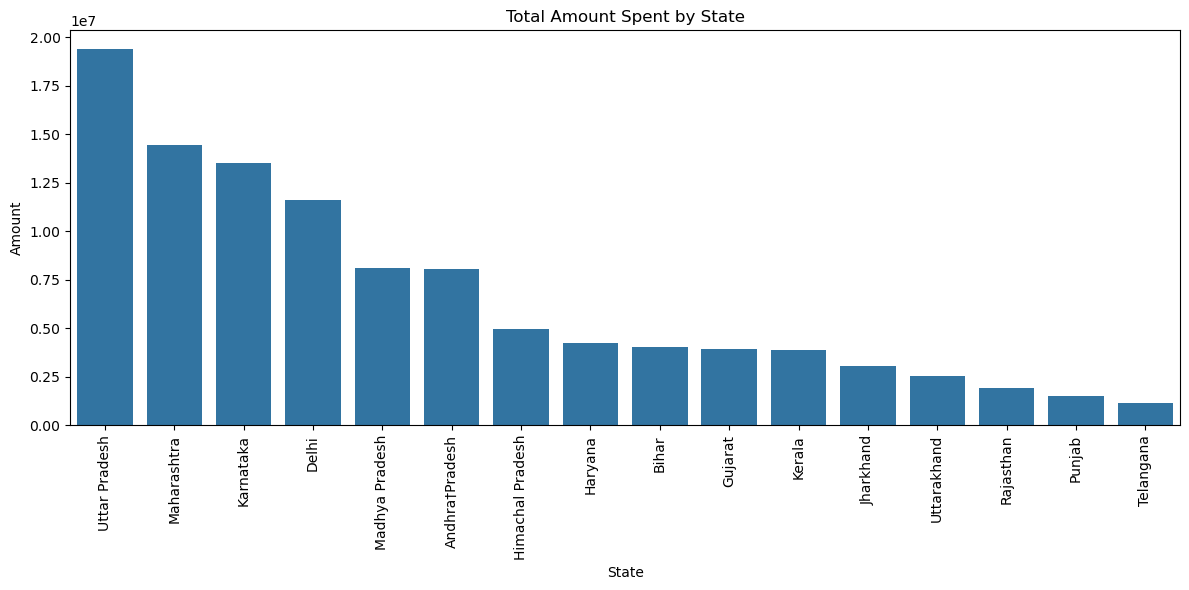

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=nysa_df,
    x='State',
    y='Amount',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('State')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Amount Spent by State')
plt.tight_layout()
plt.show()

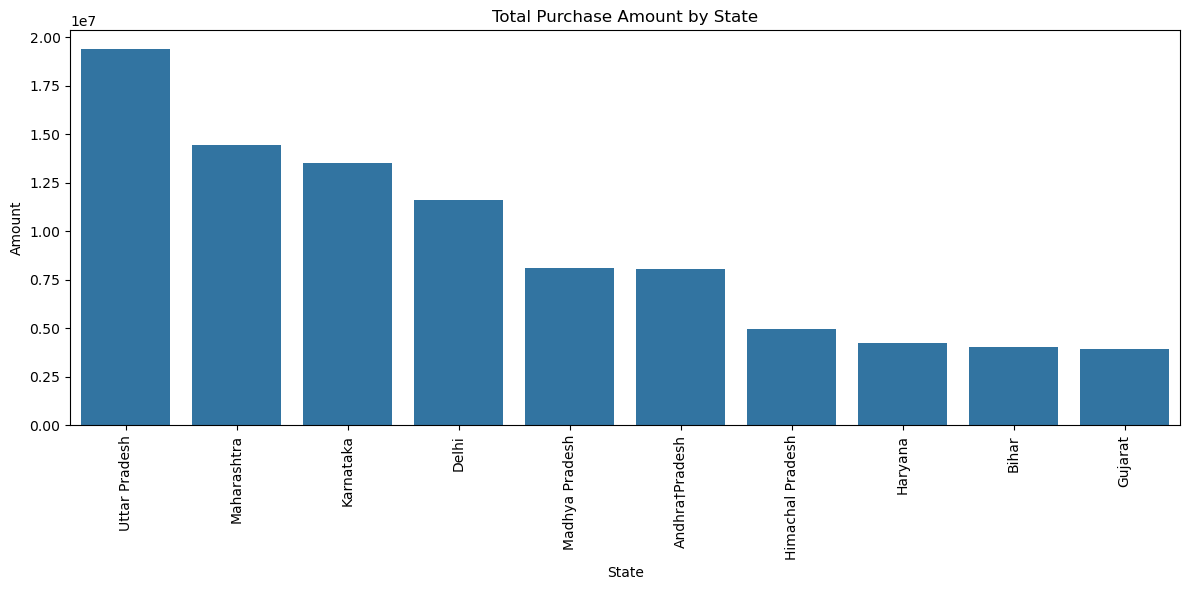

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=nysa_df,
    x='State',
    y='Amount',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).index
)
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by State')
plt.tight_layout()
plt.show()

In [37]:
## Marital Status 

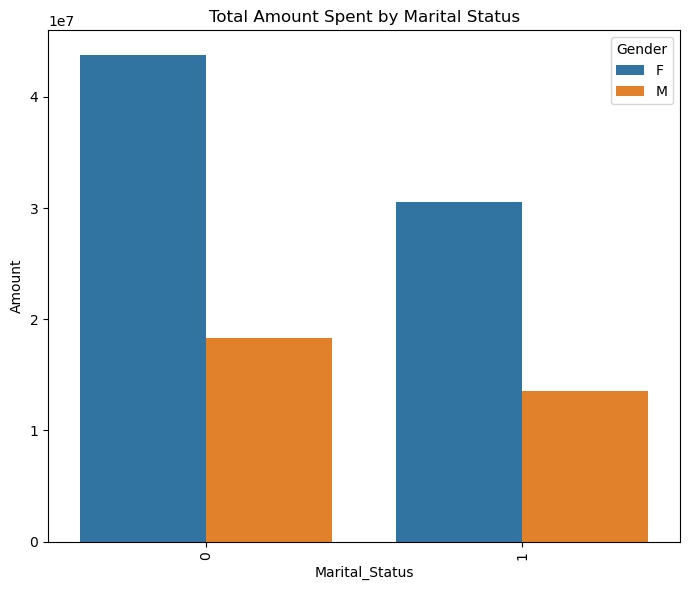

In [61]:
plt.figure(figsize=(7,6))
sns.barplot(
    data=nysa_df,
    x='Marital_Status',
    y='Amount',
    hue = 'Gender',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Amount Spent by Marital Status')
plt.tight_layout()
plt.show()

In [ ]:
##Ocupation analysis 

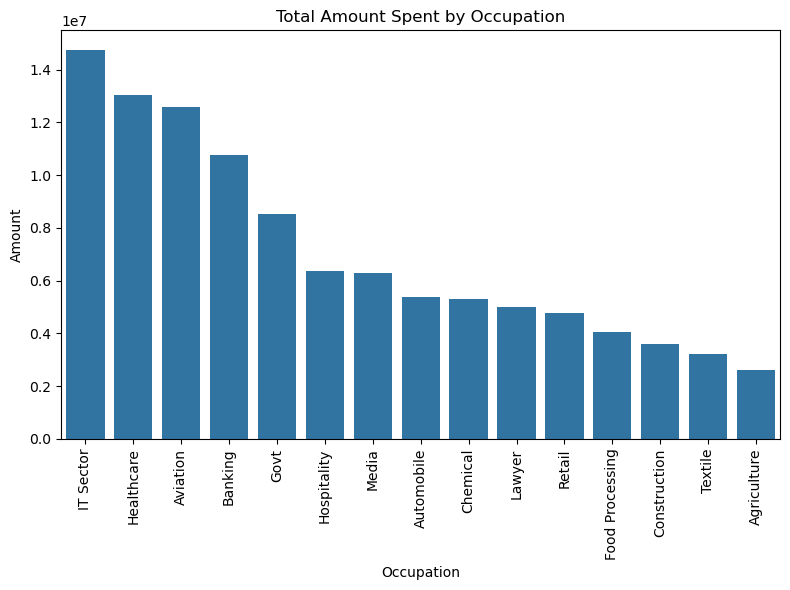

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=nysa_df,
    x='Occupation',
    y='Amount',
    ##hue = 'Gender',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Amount Spent by Occupation')
plt.tight_layout()
plt.show()

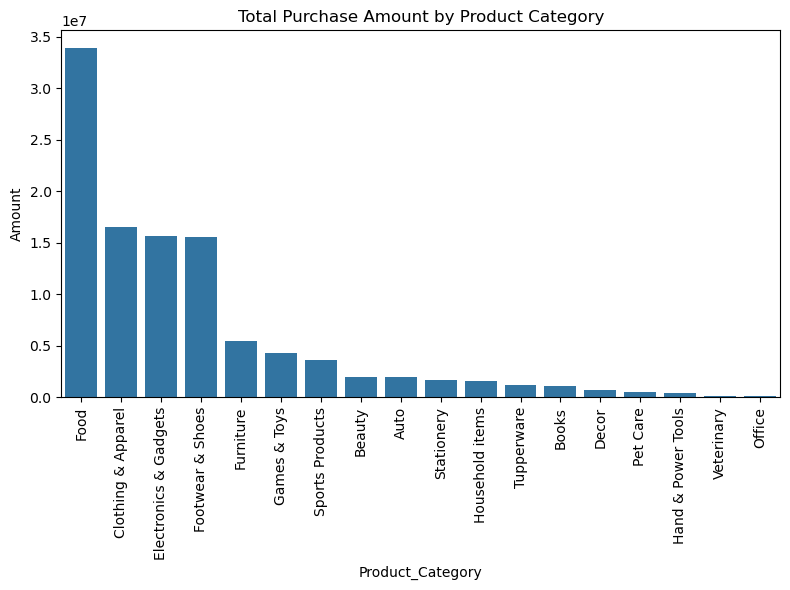

In [105]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=nysa_df,
    x='Product_Category',
    y='Amount',
    ##hue = 'Gender',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by Product Category')
plt.tight_layout()
plt.show()

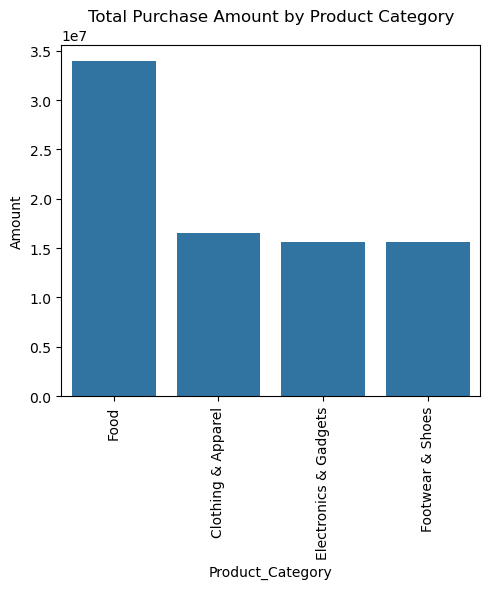

In [107]:
plt.figure(figsize=(5,6))
sns.barplot(
    data=nysa_df,
    x='Product_Category',
    y='Amount',
    ##hue = 'Gender',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(4).index
)
plt.xticks(rotation=90)
plt.title('Total Purchase Amount by Product Category')
plt.tight_layout()
plt.show()

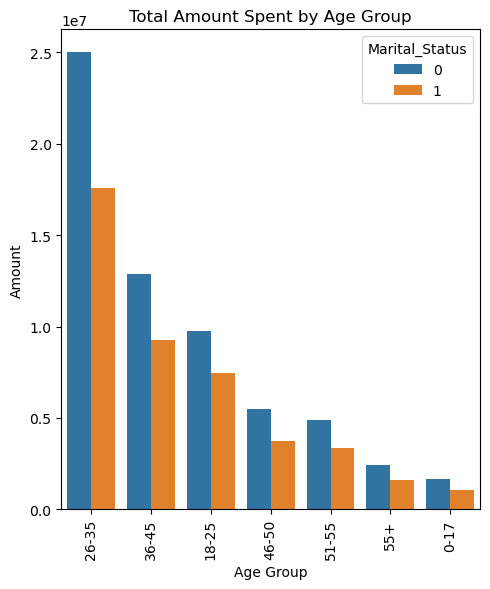

In [113]:
plt.figure(figsize=(5,6))
sns.barplot(
    data=nysa_df,
    x='Age Group',
    y='Amount',
    hue = 'Marital_Status',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Amount Spent by Age Group')
plt.tight_layout()
plt.show()

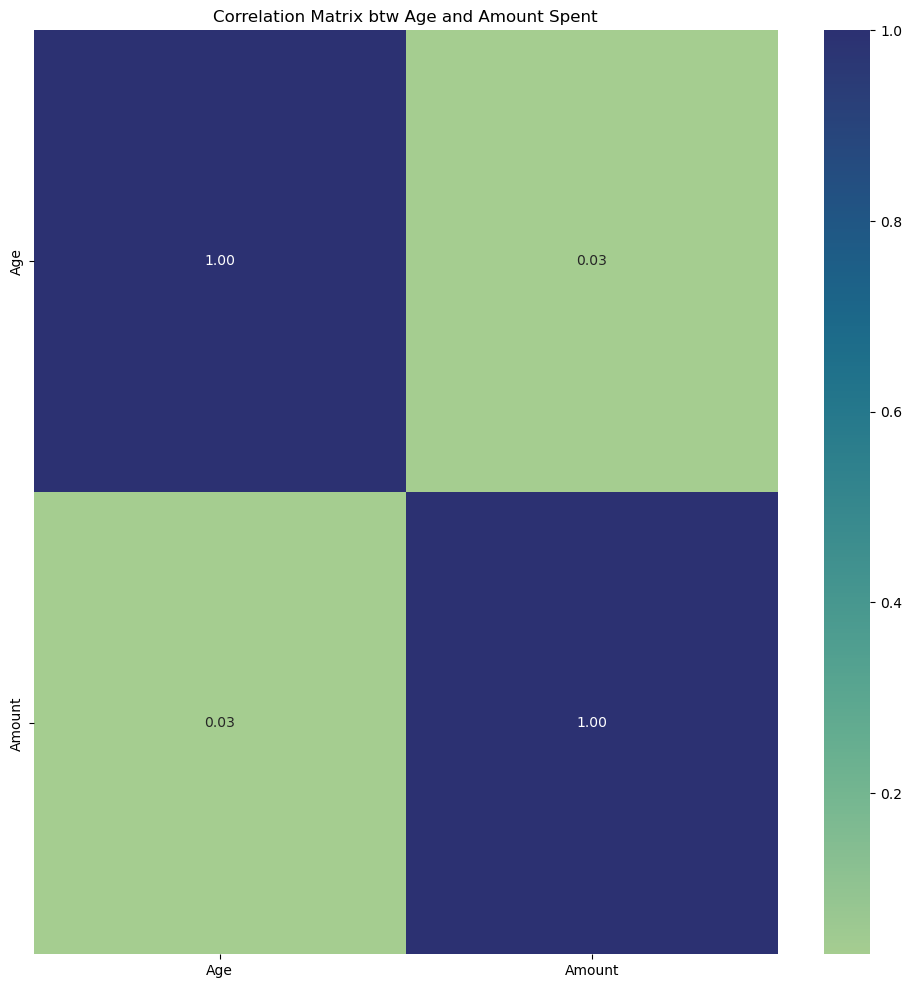

,Age,Amount
Age,1.000000,0.030941
Amount,0.030941,1.000000


In [115]:
numerical_cols = ['Age','Amount']

correlation_matrix = nysa_df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix btw Age and Amount Spent")
plt.show()
correlation_matrix

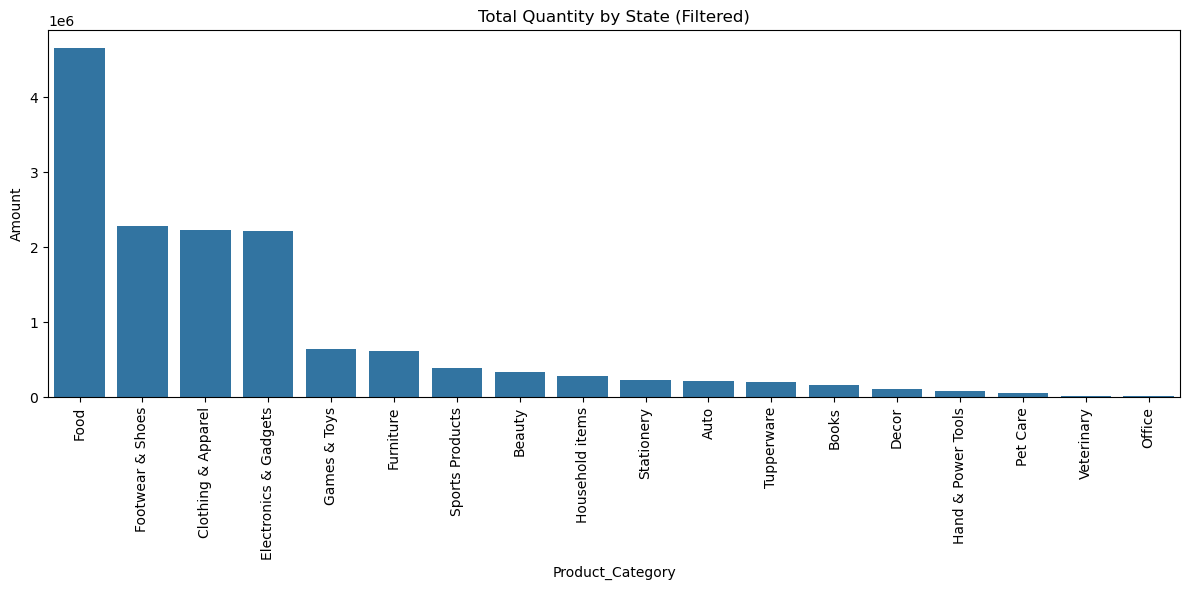

In [117]:
Occu_df = nysa_df[nysa_df['Occupation'] == 'IT Sector']  

plt.figure(figsize=(12,6))
sns.barplot(
    data=Occu_df,
    x='Product_Category',
    y='Amount',
    estimator=sum,
    errorbar=None,
    order=Occu_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Quantity by State (Filtered)')
plt.tight_layout()
plt.show()

In [121]:
grouped = nysa_df.groupby(['Product_Category', 'Age Group', 'Gender'])['Amount'].sum().reset_index()

# For each Product_Category and Gender, find the Age Group with max Amount
idx = grouped.groupby(['Product_Category', 'Gender'])['Amount'].idxmax()

# Filter rows with max contribution
result = grouped.loc[idx].reset_index(drop=True)

print(result)


         Product_Category Age Group Gender    Amount
0                    Auto     26-35      F    541529
1                    Auto     26-35      M    353578
2                  Beauty     26-35      F    622801
3                  Beauty     26-35      M    149580
4                   Books     36-45      F    152798
5                   Books     26-35      M    364103
6      Clothing & Apparel     26-35      F   4615122
7      Clothing & Apparel     26-35      M   1953600
8                   Decor     26-35      F    222345
9                   Decor     36-45      M     50138
10  Electronics & Gadgets     26-35      F   4470355
11  Electronics & Gadgets     26-35      M   1757044
12                   Food     26-35      F  10003296
13                   Food     26-35      M   3627527
14       Footwear & Shoes     26-35      F   5214125
15       Footwear & Shoes     36-45      M   1094394
16              Furniture     26-35      F   1405051
17              Furniture     26-35      M    

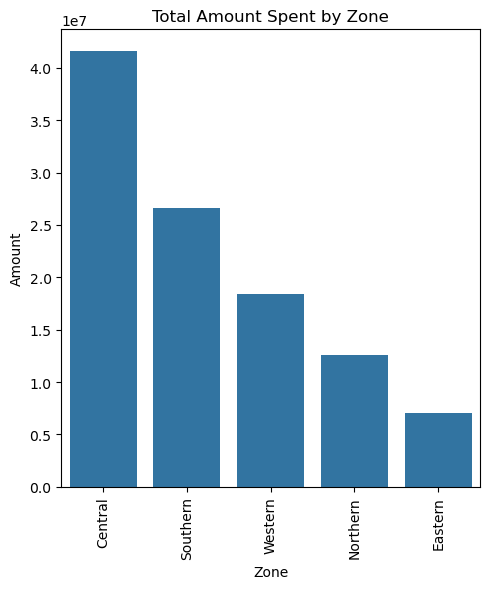

In [65]:
plt.figure(figsize=(5,6))
sns.barplot(
    data=nysa_df,
    x='Zone',
    y='Amount',
    ##hue = 'Marital_Status',
    estimator=sum,
    errorbar=None,
    order=nysa_df.groupby('Zone')['Amount'].sum().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.title('Total Amount Spent by Zone')
plt.tight_layout()
plt.show()